全局變數 & 套件包

In [24]:
import os
import time
from datetime import datetime

import pandas as pd
import requests
from yfinance import Ticker

session = requests.Session()
session.headers['User-agent'] = (
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'  # noqa: E501
)


class StockData:
    def __init__(
        self, ticker: str, name: str, session: requests.Session, start: str, end: str
    ):
        self.name = name
        self.getData(ticker, session, start, end)
        self.ax = None

    def getData(
        self, ticker: str, session: requests.Session, start: str, end: str
    ) -> None:
        printName = f'{ticker}-{start.date()}_{end.date()}'
        filename = f'data/{printName}.csv'

        if os.path.exists(filename):
            print(f'讀取 {printName} 資料: {filename}')
            self.data = pd.read_csv(filename, index_col=0, parse_dates=True)
            self.data.index = pd.to_datetime(self.data.index, utc=True)
        else:
            print(f'下載 {printName} 資料...')
            self.data = Ticker(ticker, session=session).history(start=start, end=end)
            if self.data is None:
                print(f'找不到 {printName} 的資料')
            else:
                self.data.to_csv(filename)
                print(f'{printName} 存檔至 {filename}')

    def locateRange(self, start: str, end: str) -> pd.DataFrame:
        if self.data is None:
            raise ValueError(f'{self.name} 未初始化')
        return self.data.loc[start:end]

    def resample(self, rule: str) -> pd.DataFrame:
        if self.data is None:
            raise ValueError(f'{self.name} 未初始化')
        return self.data.resample(rule)

### 第一大題: 取得數據
  使用 yfinance 抓取特斯拉、福特和通用汽車的股票價格（2013-2023 年）。

In [25]:
# 宣告時間範圍
start = datetime(2013, 1, 1)
end = datetime(2023, 1, 1)

# 建立物件實例
tesla_first = StockData('TSLA', 'Tesla', session, start, end)
time.sleep(1)
ford_first = StockData('F', 'Ford', session, start, end)
time.sleep(1)
gm_first = StockData('GM', 'GM', session, start, end)
time.sleep(1)

# 設定顯示選項
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# 顯示數據
display(tesla_first.data.head())
display(ford_first.data.head())
display(gm_first.data.head())

讀取 TSLA-2013-01-01_2023-01-01 資料: data/TSLA-2013-01-01_2023-01-01.csv
讀取 F-2013-01-01_2023-01-01 資料: data/F-2013-01-01_2023-01-01.csv
讀取 GM-2013-01-01_2023-01-01 資料: data/GM-2013-01-01_2023-01-01.csv


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-02 05:00:00+00:00,2.33,2.36,2.31,2.36,17922000,0.00,0.00
2013-01-03 05:00:00+00:00,2.35,2.36,2.32,2.32,11130000,0.00,0.00
2013-01-04 05:00:00+00:00,2.32,2.32,2.26,2.29,10110000,0.00,0.00
2013-01-07 05:00:00+00:00,2.32,2.32,2.26,2.29,6630000,0.00,0.00
2013-01-08 05:00:00+00:00,2.30,2.30,2.21,2.25,19260000,0.00,0.00


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-02 05:00:00+00:00,6.93,6.96,6.81,6.92,75274700,0.00,0.00
2013-01-03 05:00:00+00:00,6.94,7.18,6.84,7.05,121284700,0.00,0.00
2013-01-04 05:00:00+00:00,7.08,7.13,6.99,7.11,54669900,0.00,0.00
2013-01-07 05:00:00+00:00,7.08,7.12,6.99,7.04,43482400,0.00,0.00
2013-01-08 05:00:00+00:00,7.01,7.04,6.92,6.99,46336200,0.00,0.00


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-02 05:00:00+00:00,21.98,22.04,21.39,21.77,15605900,0.00,0.00
2013-01-03 05:00:00+00:00,21.71,22.59,21.55,22.28,22903800,0.00,0.00
2013-01-04 05:00:00+00:00,22.22,22.31,21.84,22.31,8066600,0.00,0.00
2013-01-07 05:00:00+00:00,22.15,22.31,21.89,22.16,8385300,0.00,0.00
2013-01-08 05:00:00+00:00,22.16,22.30,21.71,21.95,10435200,0.00,0.00


### 第二大題: 視覺化
  取得特斯拉、福特和通用汽車的股票價格 (2012 年 1月)。  
  並使用matplotlib視覺化(蠟燭圖)  
    1. 每家各別視覺化  
    2. 三家疊加到同一張圖中

讀取 TSLA-2012-01-01_2012-12-31 資料: data/TSLA-2012-01-01_2012-12-31.csv
讀取 F-2012-01-01_2012-12-31 資料: data/F-2012-01-01_2012-12-31.csv
讀取 GM-2012-01-01_2012-12-31 資料: data/GM-2012-01-01_2012-12-31.csv


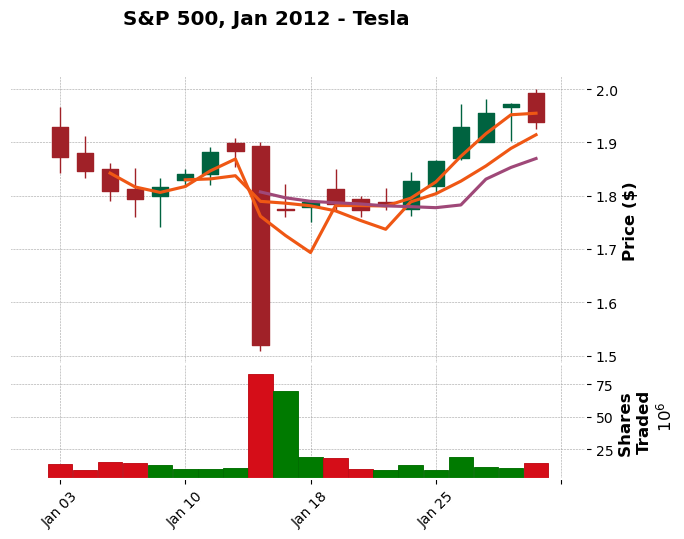

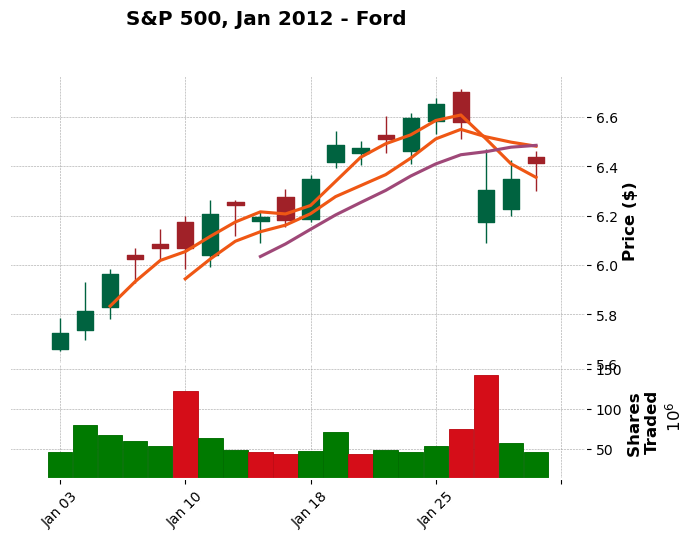

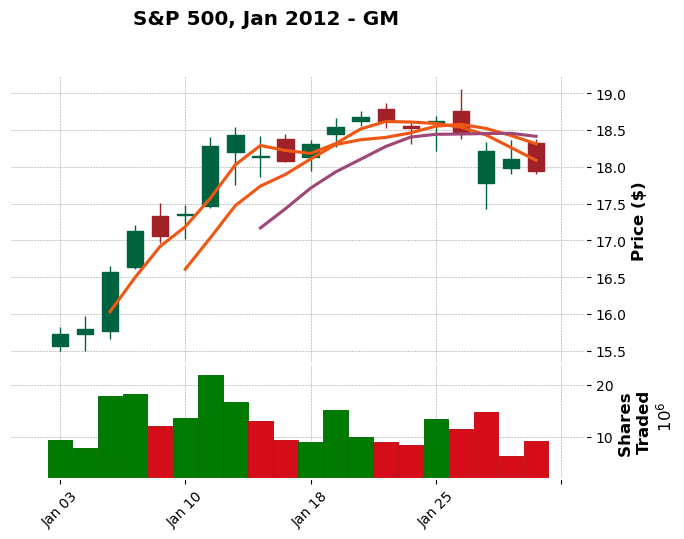

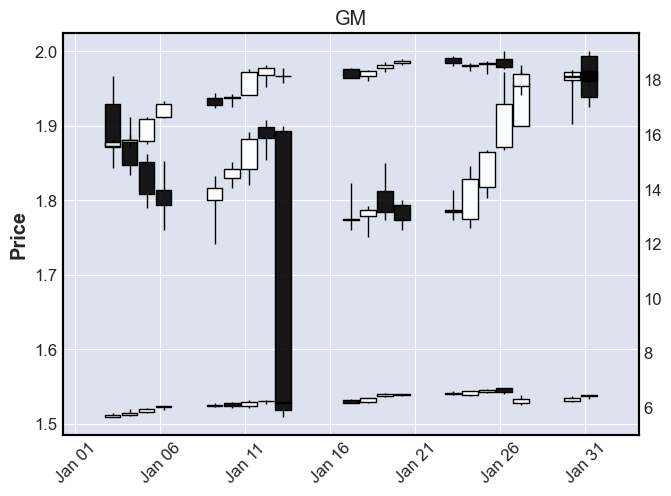

In [26]:
import matplotlib.pyplot as plt
import mplfinance as mpf

start = datetime(2012, 1, 1)
end = datetime(2012, 12, 31)

# 建立物件實例
tesla_second = StockData('TSLA', 'Tesla', session, start, end)
time.sleep(1)
ford_second = StockData('F', 'Ford', session, start, end)
time.sleep(1)
gm_second = StockData('GM', 'GM', session, start, end)
time.sleep(1)

# 第一小題
for stock in [tesla_second, ford_second, gm_second]:
    mpf.plot(
        stock.locateRange('2012-01', '2012-01'),
        type='candle',
        style='charles',
        title=f'S&P 500, Jan 2012 - {stock.name}',
        ylabel='Price ($)',
        ylabel_lower='Shares \nTraded',
        volume=True,
        mav=(3, 6, 9),
    )

# 第二小題
addplot = [
    mpf.make_addplot(ford_second.locateRange('2012-01', '2012-01'), type='candle'),
    mpf.make_addplot(gm_second.locateRange('2012-01', '2012-01'), type='candle'),
]

mpf.plot(
    tesla_second.locateRange('2012-01', '2012-01'),
    type='candle',
    addplot=addplot,
    volume=False,
    show_nontrading=True,
    axtitle=stock.name,
)

### 第三大題:基本財務分析
1. 為每個資料框建立一個名為 returns 的新欄位。該列的值將根據收盤價列計算得出。有兩種方法可以實現：一種是使用 .shift() 方法，並按照上述公式進行簡單計算；另一種是使用 pandas 內建的pct_change 方法。

2. 繪製每家公司收益率的直方圖。可以分別繪製，也可以將它們疊在一起繪製。

讀取 TSLA-2012-01-01_2022-01-01 資料: data/TSLA-2012-01-01_2022-01-01.csv
讀取 F-2012-01-01_2022-01-01 資料: data/F-2012-01-01_2022-01-01.csv
讀取 GM-2012-01-01_2022-01-01 資料: data/GM-2012-01-01_2022-01-01.csv
                           Open  High  Low  Close    Volume  Dividends  Stock Splits  returns
Date                                                                                         
2012-01-03 05:00:00+00:00  1.93  1.97 1.84   1.87  13921500       0.00          0.00      NaN
2012-01-04 05:00:00+00:00  1.88  1.91 1.83   1.85   9451500       0.00          0.00    -0.01
2012-01-05 05:00:00+00:00  1.85  1.86 1.79   1.81  15082500       0.00          0.00    -0.02
2012-01-06 05:00:00+00:00  1.81  1.85 1.76   1.79  14794500       0.00          0.00    -0.01
2012-01-09 05:00:00+00:00  1.80  1.83 1.74   1.82  13455000       0.00          0.00     0.01
                           Open  High  Low  Close    Volume  Dividends  Stock Splits  returns
Date                                            

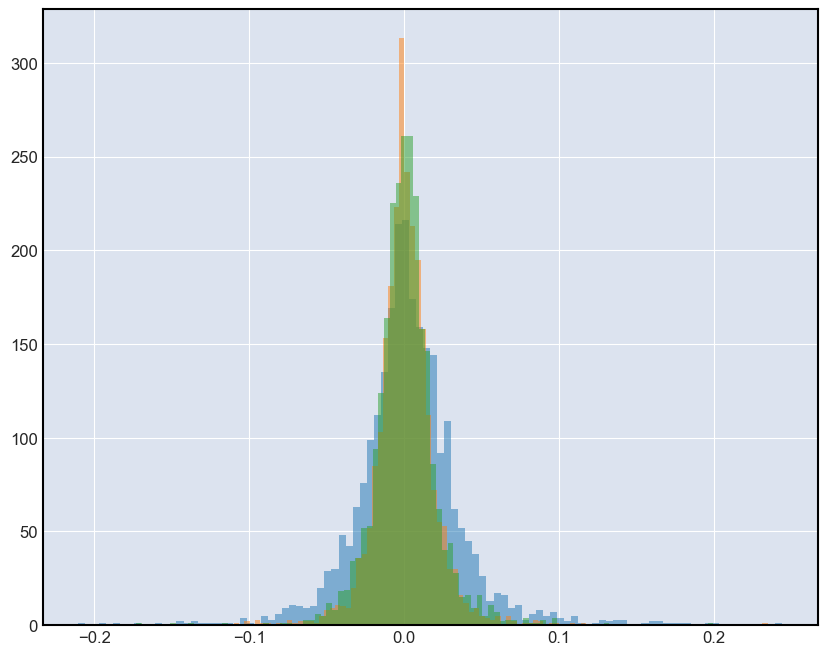

In [27]:
start = datetime(2012, 1, 1)
end = datetime(2022, 1, 1)

tesla_third = StockData('TSLA', 'Tesla', session, start, end)
ford_third = StockData('F', 'Ford', session, start, end)
gm_third = StockData('GM', 'General Motors', session, start, end)


# 方法一
# tesla_third.data['returns'] = (tesla_third.data['Close'] / tesla_third.data['Close'].shift(1) ) - 1
# ford_third.data['returns'] = (ford_third.data['Close'] / ford_third.data['Close'].shift(1) ) - 1
# gm_third.data['returns'] = (gm_third.data['Close'] / gm_third.data['Close'].shift(1) ) - 1

# 方法二
tesla_third.data['returns'] = tesla_third.data['Close'].pct_change(1)
ford_third.data['returns'] = ford_third.data['Close'].pct_change(1)
gm_third.data['returns'] = gm_third.data['Close'].pct_change(1)

tesla_third.data['returns'].hist(bins=100, label='Tesla', figsize=(10, 8), alpha=0.5)
ford_third.data['returns'].hist(bins=100, label='Ford', figsize=(10, 8), alpha=0.5)
gm_third.data['returns'].hist(bins=100, label='GM', figsize=(10, 8), alpha=0.5,)

print(tesla_third.data.head())
print(ford_third.data.head())
print(gm_third.data.head())

plt.show()

### 第四大題: 每日累積收益率

每日收益率 = (每日收盤價 - 每日開盤價) / 每日開盤價  
累積收益率 = 每日收盤價  / 首日開盤價

df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()  

(20%) Please Create a cumulative daily return column for each car company's
dataframe, response the source code and results in your document.  
(5%) Please plot three companies’ Cumulative Return columns against the time
series index in one figure. And answer which stock showed the highest return for a
$1 invested? Which showed the lowest?

In [28]:
start = datetime(2025, 1, 1)
end = datetime(2025, 11, 26)

tesla_fourth = StockData('TSLA', 'tesla', session, start, end)
ford_fourth = StockData('F', 'ford', session, start, end)
gm_fourth = StockData('GM', 'gm', session, start, end)

tesla_fourth.data['daily_cumulative_return'] = (
    1 + tesla_fourth.data['pct_daily_return']
).cumprod()
ford_fourth.data['daily_cumulative_return'] = (
    1 + ford_fourth.data['pct_daily_return']
).cumprod()
gm_fourth.data['daily_cumulative_return'] = (
    1 + gm_fourth.data['pct_daily_return']
).cumprod()

print(tesla_fourth.data['daily_cumulative_return'].tail())
print(ford_fourth.data['daily_cumulative_return'].tail())
print(gm_fourth.data['daily_cumulative_return'].tail())


下載 TSLA-2025-01-01_2025-11-26 資料...


YFRateLimitError: Too Many Requests. Rate limited. Try after a while.